# Мини-исследование для Market Researcher Position

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
#создаем датасеты
id_and_name = pd.read_excel('/Users/romanledkov/Downloads/test task raw data .xlsx',sheet_name='id and name')
name_and_site = pd.read_excel('/Users/romanledkov/Downloads/test task raw data .xlsx',sheet_name='name and site')
employees = pd.read_excel('/Users/romanledkov/Downloads/test task raw data .xlsx',sheet_name='employees')
company_info = pd.read_excel('/Users/romanledkov/Downloads/test task raw data .xlsx',sheet_name='company info')
monthly_visits = pd.read_excel('/Users/romanledkov/Downloads/test task raw data .xlsx',sheet_name='monthly visits')
headquarter = pd.read_excel('/Users/romanledkov/Downloads/test task raw data .xlsx',sheet_name='headquarter')
funding = pd.read_excel('/Users/romanledkov/Downloads/test task raw data .xlsx',sheet_name='funding')
had_cooperation_with_us = pd.read_excel('/Users/romanledkov/Downloads/test task raw data .xlsx',sheet_name='had cooperation with us')


/var/folders/xl/l5pmcf2n0w19zpsdr8cqkw9r0000gn/T/ipykernel_2717/2048363084.py:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  company_info = pd.read_excel('/Users/romanledkov/Downloads/test task raw data .xlsx',sheet_name='company info')


In [3]:
#ознакомление с датасетами
display('id_and_name',id_and_name.head())
display('name_and_site',name_and_site.head())
display('employees',employees.tail())
display('company_info',company_info.head())
display('monthly_visits',monthly_visits.head())
display('headquarter',headquarter.head())
display('funding',funding.head())
display('had_cooperation_with_us',had_cooperation_with_us.head())

'id_and_name'

,id,Organization Name
0,1,Esports Entertainment Group
1,2,Jackpocket
2,3,Flutter Entertainment
3,4,Superbet
4,5,Midnite


'name_and_site'

,Organization Name,Website
0,Esports Entertainment Group,https://esportsentertainmentgroup.com/
1,Jackpocket,https://jackpocket.com
2,Flutter Entertainment,https://www.flutter.com/
3,Superbet,https://superbet.ro/introducere
4,Midnite,https://midnite.com


'employees'

,Organization Name,Number of Employees
995,Internet Betting Sites,44835
996,kladionica.eu,44835
997,Tipster11.com,44835
998,Grand Traverse Resort & Casinos,251-500
999,Bitcoin Casino News,44835


'company_info'

,id,Founded Date,Industries
0,1,2008-01-01,"eSports, Gambling, Internet"
1,2,2013-04-29,"Gambling, Gaming, Mobile, Mobile Apps"
2,3,2000-01-01,"Gambling, Gaming, Hotel, Internet, Online Portals"
3,4,2008-01-01,"Casino, Gambling, Online Games, Sports"
4,5,2015-01-01,Gambling


'monthly_visits'

,Website,Monthly Visits
0,esportsentertainmentgroup.com,9366.0
1,jackpocket.com,128093.0
2,flutter.com,73331.0
3,superbet.ro,5422846.0
4,midnite.com,12354.0


'headquarter'

,Website,Headquarters Location
0,esportsentertainmentgroup.com,"Birkirkara, NA - Malta, Malta"
1,jackpocket.com,"New York, New York, United States"
2,flutter.com,"Dublin, Dublin, Ireland"
3,superbet.ro,"Bucharest, Bucuresti, Romania"
4,midnite.com,"London, England, United Kingdom"


'funding'

,id,Total Funding Amount
0,1,1.500000e+07
1,2,2.496000e+08
2,3,1.003033e+09
3,4,1.750000e+08
4,5,1.600000e+07


'had_cooperation_with_us'

,id,had cooperation with us
0,1,yes
1,2,yes
2,3,yes
3,4,yes
4,5,yes


In [4]:
#применеие регулярного выражения
name_and_site['Website'] = name_and_site['Website'].str.extract(r"https?://(?:www\.|)([\w.-]+).*")

In [5]:
#объединение датасетов в единую таблицу
total = pd.concat([id_and_name,
                   name_and_site['Website'],
                   employees['Number of Employees'], 
                   company_info['Founded Date'],
                   company_info['Industries'],
                   monthly_visits['Monthly Visits'],
                   headquarter['Headquarters Location'], 
                   funding['Total Funding Amount'], 
                   had_cooperation_with_us['had cooperation with us']], 
                  axis=1)
total

,id,Organization Name,Website,Number of Employees,Founded Date,Industries,Monthly Visits,Headquarters Location,Total Funding Amount,had cooperation with us
0,1,Esports Entertainment Group,esportsentertainmentgroup.com,51-100,2008-01-01,"eSports, Gambling, Internet",9366.0,"Birkirkara, NA - Malta, Malta",1.500000e+07,yes
1,2,Jackpocket,jackpocket.com,101-250,2013-04-29,"Gambling, Gaming, Mobile, Mobile Apps",128093.0,"New York, New York, United States",2.496000e+08,yes
2,3,Flutter Entertainment,flutter.com,5001-10000,2000-01-01,"Gambling, Gaming, Hotel, Internet, Online Portals",73331.0,"Dublin, Dublin, Ireland",1.003033e+09,yes
3,4,Superbet,superbet.ro,1001-5000,2008-01-01,"Casino, Gambling, Online Games, Sports",5422846.0,"Bucharest, Bucuresti, Romania",1.750000e+08,yes
4,5,Midnite,midnite.com,11-50,2015-01-01,Gambling,12354.0,"London, England, United Kingdom",1.600000e+07,yes
...,...,...,...,...,...,...,...,...,...,...
995,996,Internet Betting Sites,internetbettingsites.org,44835,2016-01-02,Gambling,1023.0,NaN,NaN,NaN
996,997,kladionica.eu,kladionica.eu,44835,2011-11-03,"Gambling, Sports",NaN,NaN,NaN,NaN
997,998,Tipster11.com,tipster11.com,44835,2014-06-01,"Fantasy Sports, Gambling, Sports",NaN,"Athens, Attiki, Greece",NaN,NaN
998,999,Grand Traverse Resort & Casinos,gtresortcasinos.com,251-500,1980-01-01,"Casino, Gambling, Resorts, Travel",NaN,"Williamsburg, Michigan, United States",NaN,NaN


In [6]:
#исправление ошибок в столбце Number of Employees
total['Number of Employees'] = total['Number of Employees'].replace(44835, '1-10')
total

,id,Organization Name,Website,Number of Employees,Founded Date,Industries,Monthly Visits,Headquarters Location,Total Funding Amount,had cooperation with us
0,1,Esports Entertainment Group,esportsentertainmentgroup.com,51-100,2008-01-01,"eSports, Gambling, Internet",9366.0,"Birkirkara, NA - Malta, Malta",1.500000e+07,yes
1,2,Jackpocket,jackpocket.com,101-250,2013-04-29,"Gambling, Gaming, Mobile, Mobile Apps",128093.0,"New York, New York, United States",2.496000e+08,yes
2,3,Flutter Entertainment,flutter.com,5001-10000,2000-01-01,"Gambling, Gaming, Hotel, Internet, Online Portals",73331.0,"Dublin, Dublin, Ireland",1.003033e+09,yes
3,4,Superbet,superbet.ro,1001-5000,2008-01-01,"Casino, Gambling, Online Games, Sports",5422846.0,"Bucharest, Bucuresti, Romania",1.750000e+08,yes
4,5,Midnite,midnite.com,11-50,2015-01-01,Gambling,12354.0,"London, England, United Kingdom",1.600000e+07,yes
...,...,...,...,...,...,...,...,...,...,...
995,996,Internet Betting Sites,internetbettingsites.org,1-10,2016-01-02,Gambling,1023.0,NaN,NaN,NaN
996,997,kladionica.eu,kladionica.eu,1-10,2011-11-03,"Gambling, Sports",NaN,NaN,NaN,NaN
997,998,Tipster11.com,tipster11.com,1-10,2014-06-01,"Fantasy Sports, Gambling, Sports",NaN,"Athens, Attiki, Greece",NaN,NaN
998,999,Grand Traverse Resort & Casinos,gtresortcasinos.com,251-500,1980-01-01,"Casino, Gambling, Resorts, Travel",NaN,"Williamsburg, Michigan, United States",NaN,NaN


In [7]:
#получение года из даты основания
total['year'] = total['Founded Date'].dt.year

In [8]:
def cooperation_point(i): #функция для баллов за кооперации
    if i == 'yes':
        return 5
    if i != 'yes':
        return 0
    
total['cooperation_point'] = total['had cooperation with us'].apply(cooperation_point)
total

,id,Organization Name,Website,Number of Employees,Founded Date,Industries,Monthly Visits,Headquarters Location,Total Funding Amount,had cooperation with us,year,cooperation_point
0,1,Esports Entertainment Group,esportsentertainmentgroup.com,51-100,2008-01-01,"eSports, Gambling, Internet",9366.0,"Birkirkara, NA - Malta, Malta",1.500000e+07,yes,2008.0,5
1,2,Jackpocket,jackpocket.com,101-250,2013-04-29,"Gambling, Gaming, Mobile, Mobile Apps",128093.0,"New York, New York, United States",2.496000e+08,yes,2013.0,5
2,3,Flutter Entertainment,flutter.com,5001-10000,2000-01-01,"Gambling, Gaming, Hotel, Internet, Online Portals",73331.0,"Dublin, Dublin, Ireland",1.003033e+09,yes,2000.0,5
3,4,Superbet,superbet.ro,1001-5000,2008-01-01,"Casino, Gambling, Online Games, Sports",5422846.0,"Bucharest, Bucuresti, Romania",1.750000e+08,yes,2008.0,5
4,5,Midnite,midnite.com,11-50,2015-01-01,Gambling,12354.0,"London, England, United Kingdom",1.600000e+07,yes,2015.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Internet Betting Sites,internetbettingsites.org,1-10,2016-01-02,Gambling,1023.0,NaN,NaN,NaN,2016.0,0
996,997,kladionica.eu,kladionica.eu,1-10,2011-11-03,"Gambling, Sports",NaN,NaN,NaN,NaN,2011.0,0
997,998,Tipster11.com,tipster11.com,1-10,2014-06-01,"Fantasy Sports, Gambling, Sports",NaN,"Athens, Attiki, Greece",NaN,NaN,2014.0,0
998,999,Grand Traverse Resort & Casinos,gtresortcasinos.com,251-500,1980-01-01,"Casino, Gambling, Resorts, Travel",NaN,"Williamsburg, Michigan, United States",NaN,NaN,1980.0,0


In [9]:
#уникальные значения для кол-ва работников
total['Number of Employees'].unique()

array(['51-100', '101-250', '5001-10000', '1001-5000', '11-50',
       '501-1000', '10001+', '251-500', '1-10', nan], dtype=object)

In [10]:
#пропуски заменяем на 1-10, так как там точно работает хотя бы 1 работник
total['Number of Employees'] = total['Number of Employees'].fillna('1-10')

In [11]:
def employees_point(i): #функция для баллов за кол-во штата
    if i == '1-10':
        return 1
    elif i == '11-50':
        return 2
    elif i == '51-100':
        return 3
    elif i == '101-250':
        return 4
    elif i == '251-500':
        return 5
    elif i == '501-1000':
        return 6
    elif i == '1001-5000':
        return 7
    elif i == '5001-10000':
        return 8
    elif i == '10001+':
        return 9
    
total['employees_point'] = total['Number of Employees'].apply(employees_point)
total

,id,Organization Name,Website,Number of Employees,Founded Date,Industries,Monthly Visits,Headquarters Location,Total Funding Amount,had cooperation with us,year,cooperation_point,employees_point
0,1,Esports Entertainment Group,esportsentertainmentgroup.com,51-100,2008-01-01,"eSports, Gambling, Internet",9366.0,"Birkirkara, NA - Malta, Malta",1.500000e+07,yes,2008.0,5,3
1,2,Jackpocket,jackpocket.com,101-250,2013-04-29,"Gambling, Gaming, Mobile, Mobile Apps",128093.0,"New York, New York, United States",2.496000e+08,yes,2013.0,5,4
2,3,Flutter Entertainment,flutter.com,5001-10000,2000-01-01,"Gambling, Gaming, Hotel, Internet, Online Portals",73331.0,"Dublin, Dublin, Ireland",1.003033e+09,yes,2000.0,5,8
3,4,Superbet,superbet.ro,1001-5000,2008-01-01,"Casino, Gambling, Online Games, Sports",5422846.0,"Bucharest, Bucuresti, Romania",1.750000e+08,yes,2008.0,5,7
4,5,Midnite,midnite.com,11-50,2015-01-01,Gambling,12354.0,"London, England, United Kingdom",1.600000e+07,yes,2015.0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Internet Betting Sites,internetbettingsites.org,1-10,2016-01-02,Gambling,1023.0,NaN,NaN,NaN,2016.0,0,1
996,997,kladionica.eu,kladionica.eu,1-10,2011-11-03,"Gambling, Sports",NaN,NaN,NaN,NaN,2011.0,0,1
997,998,Tipster11.com,tipster11.com,1-10,2014-06-01,"Fantasy Sports, Gambling, Sports",NaN,"Athens, Attiki, Greece",NaN,NaN,2014.0,0,1
998,999,Grand Traverse Resort & Casinos,gtresortcasinos.com,251-500,1980-01-01,"Casino, Gambling, Resorts, Travel",NaN,"Williamsburg, Michigan, United States",NaN,NaN,1980.0,0,5


In [12]:
#мин и макс год основания контор
display(
    total['year'].min(),
    total['year'].max())

1863.0

2022.0

разделим получившийся отрезок на 10 частей, чтобы можно было разбить компании по 10 бальной шкале, кто дольше держится на рынке, тому и отдаем предпочтение

In [13]:
#подсчеты
time_step = total['year'].max()-total['year'].min()
time_step = time_step/10
time_step

15.9

один балл за каждые 16 лет. 

In [14]:
def year_point(i): #функция для баллов за кол-во штата
    if i < 1879:
        return 10
    elif i < 1895:
        return 9
    elif i < 1911:
        return 8
    elif i < 1927:
        return 7
    elif i < 1943:
        return 6
    elif i < 1959:
        return 5
    elif i < 1975:
        return 4
    elif i < 1991:
        return 3
    elif i < 2007:
        return 2
    else: 
        return 1

    
total['year_point'] = total['year'].apply(year_point)
total

,id,Organization Name,Website,Number of Employees,Founded Date,Industries,Monthly Visits,Headquarters Location,Total Funding Amount,had cooperation with us,year,cooperation_point,employees_point,year_point
0,1,Esports Entertainment Group,esportsentertainmentgroup.com,51-100,2008-01-01,"eSports, Gambling, Internet",9366.0,"Birkirkara, NA - Malta, Malta",1.500000e+07,yes,2008.0,5,3,1
1,2,Jackpocket,jackpocket.com,101-250,2013-04-29,"Gambling, Gaming, Mobile, Mobile Apps",128093.0,"New York, New York, United States",2.496000e+08,yes,2013.0,5,4,1
2,3,Flutter Entertainment,flutter.com,5001-10000,2000-01-01,"Gambling, Gaming, Hotel, Internet, Online Portals",73331.0,"Dublin, Dublin, Ireland",1.003033e+09,yes,2000.0,5,8,2
3,4,Superbet,superbet.ro,1001-5000,2008-01-01,"Casino, Gambling, Online Games, Sports",5422846.0,"Bucharest, Bucuresti, Romania",1.750000e+08,yes,2008.0,5,7,1
4,5,Midnite,midnite.com,11-50,2015-01-01,Gambling,12354.0,"London, England, United Kingdom",1.600000e+07,yes,2015.0,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Internet Betting Sites,internetbettingsites.org,1-10,2016-01-02,Gambling,1023.0,NaN,NaN,NaN,2016.0,0,1,1
996,997,kladionica.eu,kladionica.eu,1-10,2011-11-03,"Gambling, Sports",NaN,NaN,NaN,NaN,2011.0,0,1,1
997,998,Tipster11.com,tipster11.com,1-10,2014-06-01,"Fantasy Sports, Gambling, Sports",NaN,"Athens, Attiki, Greece",NaN,NaN,2014.0,0,1,1
998,999,Grand Traverse Resort & Casinos,gtresortcasinos.com,251-500,1980-01-01,"Casino, Gambling, Resorts, Travel",NaN,"Williamsburg, Michigan, United States",NaN,NaN,1980.0,0,5,3


<AxesSubplot:>

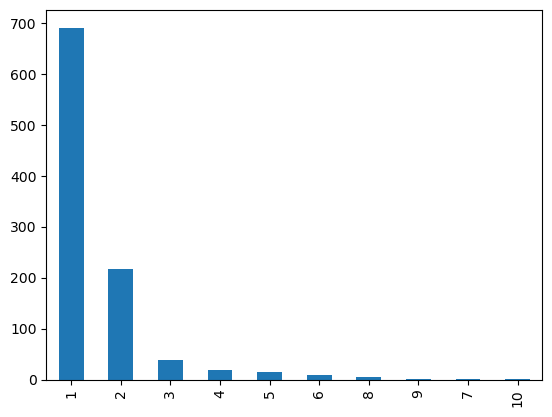

In [15]:
total['year_point'].value_counts().plot.bar()
#Количесвто контор по баллам
#больше всего новых контор

In [16]:
#медианное и максимальное значение посещений в месяц
display(total['Monthly Visits'].median(),
       total['Monthly Visits'].max())
total['Monthly Visits'].describe()


7942.5

113813930.0

count    4.660000e+02
mean     1.131387e+06
std      7.146491e+06
min      1.000000e+00
25%      1.367500e+03
50%      7.942500e+03
75%      1.211480e+05
max      1.138139e+08
Name: Monthly Visits, dtype: float64

In [17]:
#замена пропусков на 0
total['Monthly Visits'] = total['Monthly Visits'].fillna(0)

In [18]:
def visits_point(i): #функция для баллов за кол-во штата
    if i <= 100:
        return 1
    elif i <= 1000:
        return 2
    elif i <= 10000:
        return 4
    elif i <= 100000:
        return 6
    elif i <= 1000000:
        return 8
    else:
        return 10

total['visits_point'] = total['Monthly Visits'].apply(visits_point)

In [19]:
#замена пропусков на 0
total['Total Funding Amount'] = total['Total Funding Amount'].fillna(0)

In [20]:
total['Total Funding Amount'].min()
def funding_point(i): #функция для баллов за кол-во штата
    if i <= 10000:
        return 1
    elif i <= 100000:
        return 2
    elif i <= 1000000:
        return 3
    elif i <= 10000000:
        return 4
    elif i <= 100000000:
        return 5
    elif i <= 1000000000:
        return 6
    elif i <= 1000000000:
        return 7
    elif i <= 10000000000:
        return 8


total['funding_point'] = total['Total Funding Amount'].apply(funding_point)

<AxesSubplot:>

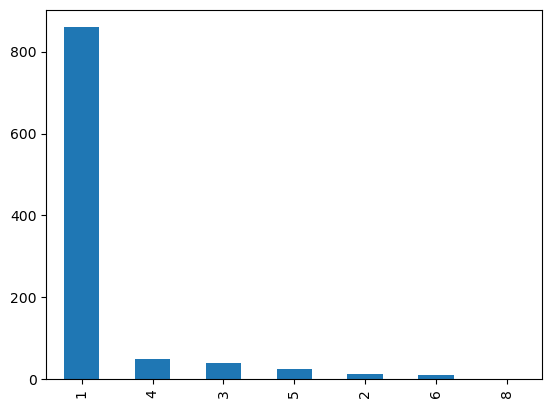

In [28]:
total['funding_point'].value_counts().plot.bar()
#Количесвто контор по баллам
#больше всего контор с малым количестовм общего финансирования

In [26]:
#подсчет общего количества баллов
total['total_points'] = total['cooperation_point'] + total['employees_point'] + total['year_point'] + total['visits_point'] + total['funding_point']
total

,id,Organization Name,Website,Number of Employees,Founded Date,Industries,Monthly Visits,Headquarters Location,Total Funding Amount,had cooperation with us,year,cooperation_point,employees_point,year_point,visits_point,funding_point,total_points
0,1,Esports Entertainment Group,esportsentertainmentgroup.com,51-100,2008-01-01,"eSports, Gambling, Internet",9366.0,"Birkirkara, NA - Malta, Malta",15000000.0,yes,2008.0,5,3,1,4,5,18
510,511,Sands China,sandschina.com,10001+,2004-01-01,"Gambling, Hospitality, Resorts",6.0,"Taipa, Ilhas, Macao",0.0,yes,2004.0,5,9,2,1,1,18
494,495,BetStarters,betstarters.com,11-50,2016-01-01,"Consulting, Gambling, Software",0.0,"Marsaskala, NA - Malta, Malta",0.0,yes,2016.0,5,2,1,1,1,10
495,496,Intuicode Gaming,intuicode.com,1-10,NaT,"Casino, Gambling",0.0,"Boynton Beach, Florida, United States",0.0,yes,NaN,5,1,1,1,1,9
496,497,PDS Gaming,pdsgaming.com,1-10,1988-01-01,"Casino, Gambling, Professional Services",0.0,"Las Vegas, Nevada, United States",0.0,yes,1988.0,5,1,3,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,533,Lotto24,lotto24-ag.de,51-100,2010-01-01,"Gambling, Internet",1832.0,"Hamburg, Hamburg, Germany",0.0,NaN,2010.0,0,3,1,4,1,9
533,534,MEGABET PLUS,megabetplus.com,101-250,1987-01-01,"Gambling, Gaming, Small and Medium Businesses",8051.0,"Strovolos, Nicosia, Cyprus",0.0,NaN,1987.0,0,4,3,4,1,12
534,535,Bitmarkers,bitmarkers.com,1-10,2013-06-01,"Bitcoin, Financial Services, Gambling",0.0,"Las Vegas, Nevada, United States",0.0,NaN,2013.0,0,1,1,1,1,4
535,536,Sportsbook Solutions,sportsbooksolutions.co.uk,1-10,2013-01-01,"Casino, Gambling",0.0,"Manchester, Manchester, United Kingdom",0.0,NaN,2013.0,0,1,1,1,1,4


<a id='section_final'></a>

# Выводы

Готовая таблица, ранжированная по сумме всех баллов. 
Баллы начислялись за:
1. Работали ли мы вместе ранее, это важный фактор, который влияет на доверительные отношения между компаниями. 
2. Количество работников, чем больше работников, тем больше баллов получала фирма. 
3. В каком году основана компания, чем компания старше, тем больше баллов ей начислялос. 
4. Количество месячных пользователей, так же важный фактор, влияющий на интерес к компании. 
5. Общая сумма финансирования (если быть честным, то не очень понятно, что имеется в виду под этим понятием, если расценивать как больше=лучше, то прибавляем полученные баллы, так, как я это сделал выше, если же число больше=хуже, то просто меняем в `total['total_points']` "+" на "-" перед `total['funding_point']`

In [27]:
#ранжирование контор по сумме общего количества баллов
total = total.sort_values(by='total_points', ascending=False)
total

,id,Organization Name,Website,Number of Employees,Founded Date,Industries,Monthly Visits,Headquarters Location,Total Funding Amount,had cooperation with us,year,cooperation_point,employees_point,year_point,visits_point,funding_point,total_points
8,9,MGM Resorts International,mgmresorts.com,10001+,2000-01-01,"Gambling, Hospitality, Resorts",7355254.0,"Las Vegas, Nevada, United States",2.000000e+09,yes,2000.0,5,9,2,10,8,34
41,42,Enjoy,enjoy.cl,10001+,1975-01-01,Gambling,86009.0,"Santiago, Region Metropolitana, Chile",1.200000e+08,yes,1975.0,5,9,3,6,6,29
3,4,Superbet,superbet.ro,1001-5000,2008-01-01,"Casino, Gambling, Online Games, Sports",5422846.0,"Bucharest, Bucuresti, Romania",1.750000e+08,yes,2008.0,5,7,1,10,6,29
2,3,Flutter Entertainment,flutter.com,5001-10000,2000-01-01,"Gambling, Gaming, Hotel, Internet, Online Portals",73331.0,"Dublin, Dublin, Ireland",1.003033e+09,yes,2000.0,5,8,2,6,8,29
461,462,Monte-Carlo SBM,montecarlosbm.com,1001-5000,1863-01-01,"Casino, Gambling, Hospitality",131047.0,"Montecarlo, Coahuila de Zaragoza, Mexico",0.000000e+00,NaN,1863.0,0,7,10,8,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,242,Free Bet King,freebetking.co.uk,1-10,2017-12-04,"Advertising, Gambling, Gaming, Internet, Marke...",0.0,"Manchester, Manchester, United Kingdom",0.000000e+00,NaN,2017.0,0,1,1,1,1,4
238,239,SportStack,sportstack.com,1-10,2019-02-01,"Fantasy Sports, Gambling, Sports",0.0,"London, England, United Kingdom",0.000000e+00,NaN,2019.0,0,1,1,1,1,4
990,991,World Biff LLC,worldbiff.com,1-10,2007-03-11,Gambling,0.0,"Krasnoyarsk, Krasnoyarskiy Kray, Russian Feder...",0.000000e+00,NaN,2007.0,0,1,1,1,1,4
372,373,Mov,mymov.co,1-10,NaT,"Apps, Fantasy Sports, Gambling, Sports",0.0,"Lewes, Delaware, United States",0.000000e+00,NaN,NaN,0,1,1,1,1,4


In [24]:
total.to_csv('final_table.csv')